# IMPORTS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import numpy as np

from sklearn.model_selection import train_test_split

import pickle

import matplotlib as plot
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# INFORMAÇÕES BANCO DE DADOS

In [ ]:
#lendo arquivo e dropando tabelas desnecessarias
csvdata = pd.read_csv("/content/sample_data/heart_failure_clinical_records_dataset.csv", ";", encoding="ISO-8859-1")
csvdata


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582,0.0,20,1.0,265000.00,1.9,130,1.0,0.0,4,1
1,55.0,NaN,7861,0.0,38,0.0,263358.03,1.1,136,1.0,0.0,6,1
2,65.0,NaN,146,0.0,20,0.0,162000.00,1.3,129,NaN,1.0,7,1
3,50.0,NaN,111,NaN,20,NaN,210000.00,1.9,137,1.0,0.0,7,1
4,65.0,NaN,160,NaN,20,0.0,327000.00,2.7,116,0.0,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61,1.0,38,1.0,155000.00,1.1,143,NaN,1.0,270,0
295,55.0,0.0,1820,0.0,38,0.0,270000.00,1.2,139,0.0,NaN,271,0
296,45.0,NaN,2060,1.0,60,0.0,742000.00,0.8,138,0.0,0.0,278,0
297,45.0,0.0,2413,NaN,38,0.0,140000.00,1.4,140,1.0,1.0,280,0


In [ ]:
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   216 non-null    float64
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  221 non-null    float64
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       202 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       191 non-null    float64
 10  smoking                   208 non-null    float64
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 30.5 KB


In [ ]:
csvdata.shape

(299, 13)

# TIPO DATE

In [ ]:
#COMANDO PARA TRANSFORMAR A DATA DO BANCO EM TIPO DATE
#csvdata['date']pd.to_datetime(csvdata['date'],infer_datetime_format = True )
#----------------------------------------------------------

# Representação Gráfica e análises descritiva

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


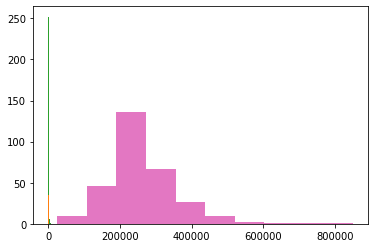

In [ ]:
# Representação Gráfica e análises descritiva de todas as colunas da nossa base de dados
columns = csvdata.columns
for i in columns:
  print(i)
  plt.hist(x=csvdata[i]);

ANALISE GRAFICA DE APENAS UMA COLUNA DA BASE DE DADOS

In [ ]:
np.unique(csvdata["DEATH_EVENT"], return_counts=True)

(array([0, 1]), array([203,  96]))

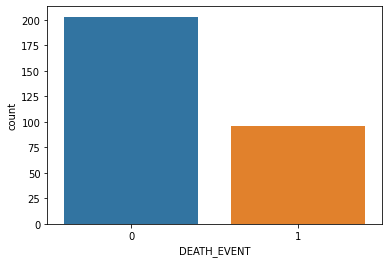

In [ ]:
sns.countplot(x = csvdata["DEATH_EVENT"]);

# ETAPA EXCLUSÃO

In [ ]:
# Essa etapa consiste na exclusão das linhas que apresentam dados negativas
# exemplo:
# csvdata.drop ( csvdata [ csvdata.idade < 0 ] .index , inplace = True )

# LIDA COM DADOS AUSENTOS

In [ ]:
# Mostra n° de dados ausentes na base de dados
csvdata.isnull().sum()

age                           0
anaemia                      83
creatinine_phosphokinase      0
diabetes                     78
ejection_fraction             0
high_blood_pressure          97
platelets                     0
serum_creatinine              0
serum_sodium                  0
sex                         108
smoking                      91
time                          0
DEATH_EVENT                   0
dtype: int64

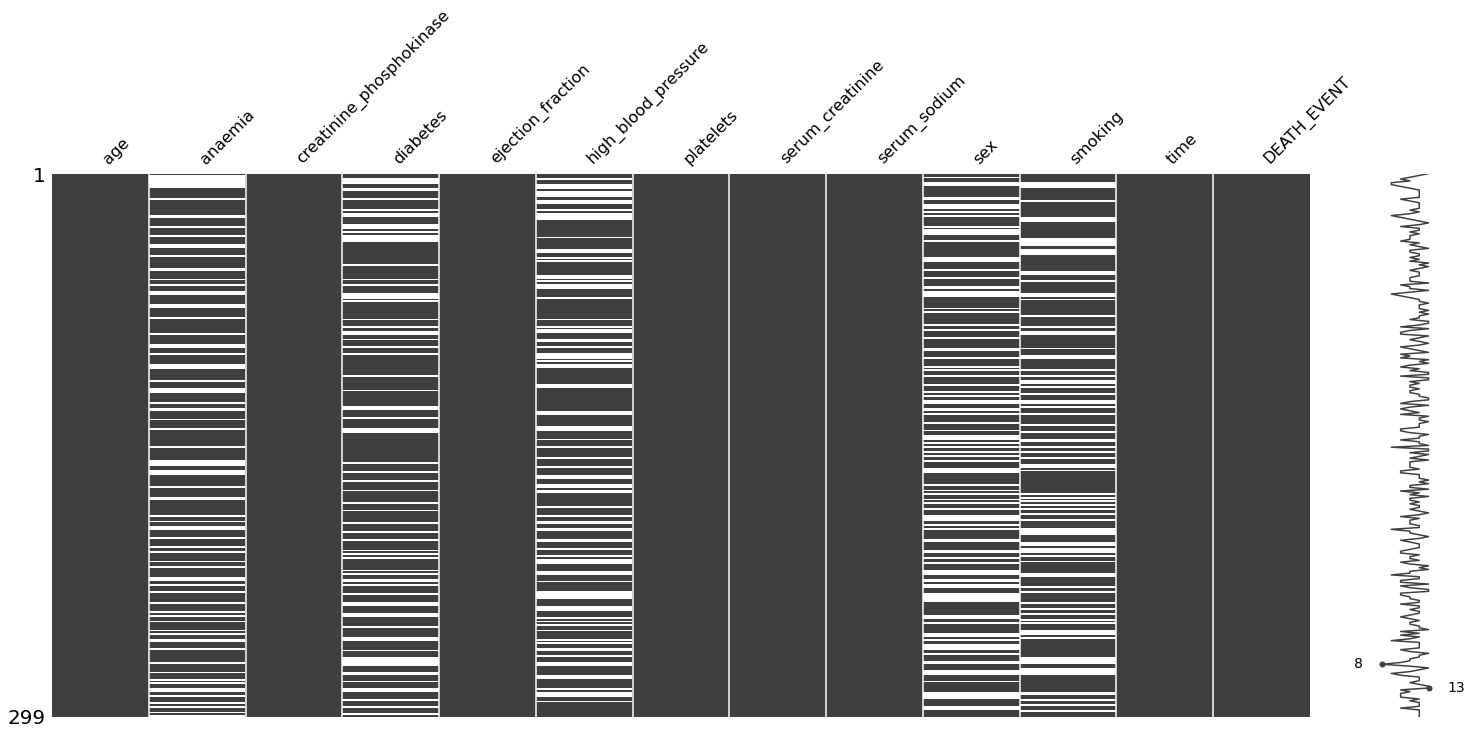

In [ ]:
# Mostra n° de dados ausentes na base de dados (REPRESENTAÇÃO GRAFICA)
msno.matrix(csvdata);

In [ ]:
# apresenta a quantidade de vezes que aparece cada valor 
csvdata['anaemia'].value_counts()

0.0    125
1.0     91
Name: anaemia, dtype: int64

In [ ]:
# TRATA DE FATO OS DADOS AUSENTES
csvdata['anaemia'].fillna(0)


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: anaemia, Length: 299, dtype: float64


# Lidadno com OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

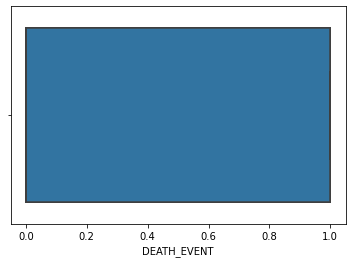

In [ ]:
#Esse gráfico (Boxplot) permite visualizar a distribuição de valores discrepantes (outliers) dos dados.          INDENTIFICA OS OUTLIYERS
columns = csvdata.columns
for i in columns:  
  sns.boxplot (csvdata['DEATH_EVENT'])

In [ ]:
superior_conta = csvdata['DEATH_EVENT'].mean() + 1.5*(9998-2494.25)
inferior_conta = csvdata['DEATH_EVENT'].mean() - 1.5*(9998-2494.25)

# Tratamento do binário

In [ ]:
X_prev = csvdata.iloc[:, 1:2].values 
#Pegando apenas os valores das 10 primeiras linhas
# Imprime todas as linhas das colunas 0 a 10
X_prev

array([[ 0.],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [nan],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [nan],
       [nan],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [nan],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [nan],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [nan],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [nan],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [nan],
       [nan],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [nan],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [nan],
       [nan],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [ ]:
X_prev_label = csvdata.iloc[:, 1:2]
X_prev_label

,anaemia
0,0.0
1,NaN
2,NaN
3,NaN
4,NaN
...,...
294,0.0
295,0.0
296,NaN
297,0.0


In [ ]:
X_prev[:,0] # Imprime todas as linhas da coluna 5 (tirando o header)

array([ 0., nan, nan, nan, nan, nan, nan, nan,  0.,  1.,  1.,  0.,  1.,
        1., nan,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., nan, nan,  0.,
        1.,  0.,  1., nan,  0.,  0.,  1.,  1., nan,  0.,  1.,  1.,  0.,
       nan, nan,  0.,  0.,  0.,  1., nan,  0.,  0.,  1.,  1.,  1.,  1.,
       nan, nan,  1.,  1.,  1.,  1., nan,  0.,  0., nan,  0.,  0.,  0.,
       nan, nan,  1.,  0.,  0.,  0.,  0., nan, nan,  0.,  1.,  0.,  0.,
        1., nan,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1., nan,  1.,  0.,
        0.,  0.,  1., nan, nan,  1.,  1.,  1., nan,  1.,  0.,  0.,  0.,
        0., nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  1., nan,  1.,  1.,
        1., nan, nan, nan,  1.,  0.,  1.,  0.,  1., nan,  1.,  0., nan,
       nan,  1.,  0.,  0.,  0., nan,  1.,  1.,  0.,  0., nan,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  0., nan,  0.,  0.,  0.,  1.,  1.,
        1.,  0., nan, nan, nan,  1.,  1., nan, nan, nan,  0.,  0.,  0.,
        0.,  1.,  0., nan,  1.,  0.,  1.,  0.,  1., nan, nan,  0

In [ ]:
Y_classe = csvdata.iloc[:, 10].values # Entrada = X_Prev Saída = Y_classe
Y_classe

array([ 0.,  0.,  1.,  0.,  0., nan, nan, nan,  0.,  1.,  1.,  1.,  0.,
        0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., nan, nan,
       nan,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan,
       nan,  1.,  1., nan, nan, nan,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0., nan, nan,  1.,  1.,  1., nan,  0.,  0.,  1.,  0.,  0.,
        1., nan, nan,  0., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
       nan,  0.,  0.,  1.,  0.,  0., nan,  0.,  0., nan, nan,  0.,  1.,
        0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0., nan, nan,  1.,  1.,
        0.,  1.,  0.,  0., nan,  1.,  1., nan,  0.,  0., nan, nan,  0.,
       nan,  0.,  0.,  1., nan,  0.,  0.,  0., nan, nan,  0., nan,  0.,
        1.,  0., nan,  1.,  1.,  0.,  0.,  0., nan,  0.,  0.,  0., nan,
        0.,  1.,  1., nan, nan,  0.,  0., nan,  0.,  1., nan,  0.,  0.,
       nan,  1.,  0.,  1., nan, nan,  1., nan,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1., nan,  0., nan,  1., na

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X_prev[:, 0]

X_prev[:, 0] = label_encoder.fit_transform(X_prev[:, 0])

X_prev

array([[0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],

In [ ]:
onehotencoder_rest = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])], remainder="passthrough")
# Passamos como argumento as colunas que gostaríamos de binarizar

In [ ]:
X_prev = onehotencoder_rest.fit_transform(X_prev)
X_prev

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [ ]:
X_prev.shape # Mostra a quantidade de linhas e colunas

(299, 3)

# Modelo de amostragem Holdout

In [ ]:
Y_classe
Y_classe.shape

(299,)

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_prev, Y_classe, test_size = 0.20, random_state=0)
# Random state = 0 = toda vez que rodarmos ele gera outra instância
# X_treino = atributos para treinar
# Y_treino = classe objetivo dos atributos de treino
# Y = atributos de saída

# X_teste = atributos do teste
# Y_teste = classe objetivo dos atributos de teste

print(X_treino.shape)
X_teste.shape

(239, 3)


(60, 3)

In [ ]:
X_treino.shape

(239, 3)

In [ ]:
X_teste.shape

(60, 3)

In [ ]:
Y_treino.shape

(239,)

In [ ]:
Y_teste.shape

(60,)

# NORMALIZAÇÃO DOS DADOS

In [ ]:
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   216 non-null    float64
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  221 non-null    float64
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       202 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       191 non-null    float64
 10  smoking                   208 non-null    float64
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 30.5 KB


In [ ]:
csvdata.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582,0.0,20,1.0,265000.00,1.9,130,1.0,0.0,4,1
1,55.0,NaN,7861,0.0,38,0.0,263358.03,1.1,136,1.0,0.0,6,1
2,65.0,NaN,146,0.0,20,0.0,162000.00,1.3,129,NaN,1.0,7,1
3,50.0,NaN,111,NaN,20,NaN,210000.00,1.9,137,1.0,0.0,7,1
4,65.0,NaN,160,NaN,20,0.0,327000.00,2.7,116,0.0,0.0,8,1


In [ ]:
x = csvdata[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure',	'platelets', 'serum_creatinine','serum_sodium','sex','smoking','time']]
y = csvdata[['DEATH_EVENT']]

In [ ]:
csvdata.info()
csvdata['DEATH_EVENT'] = csvdata['DEATH_EVENT'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   216 non-null    float64
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  221 non-null    float64
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       202 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       191 non-null    float64
 10  smoking                   208 non-null    float64
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 30.5 KB


In [ ]:
csvdata.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582,0.0,20,1.0,265000.00,1.9,130,1.0,0.0,4,1.0
1,55.0,NaN,7861,0.0,38,0.0,263358.03,1.1,136,1.0,0.0,6,1.0
2,65.0,NaN,146,0.0,20,0.0,162000.00,1.3,129,NaN,1.0,7,1.0
3,50.0,NaN,111,NaN,20,NaN,210000.00,1.9,137,1.0,0.0,7,1.0
4,65.0,NaN,160,NaN,20,0.0,327000.00,2.7,116,0.0,0.0,8,1.0


In [ ]:
csvdata['diabetes'] = csvdata['diabetes'].astype('Int64')

In [ ]:
normal = pd.DataFrame(StandardScaler().fit_transform(x))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( normal,y, test_size=0.3, random_state = 10)

In [ ]:
csvdata['anaemia']=pd.to_numeric(csvdata['anaemia'],errors = 'coerce')
csvdata['creatinine_phosphokinase']=pd.to_numeric(csvdata['creatinine_phosphokinase'],errors = 'coerce')
csvdata['ejection_fraction']=pd.to_numeric(csvdata['ejection_fraction'],errors = 'coerce')
csvdata['high_blood_pressure']=pd.to_numeric(csvdata['high_blood_pressure'],errors = 'coerce')

In [ ]:
from sklearn.linear_model import LinearRegression 
regr = LinearRegression()
regr.fit(x_train, y_train)

ValueError: ignored

In [ ]:
regr.predict(x_test)

NotFittedError: ignored

In [ ]:
regr.score(x_test,y_test)

NotFittedError: ignored

In [ ]:
regr.score(x_train,y_train)

NotFittedError: ignored

In [ ]:
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   216 non-null    float64
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  221 non-null    Int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       202 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       191 non-null    float64
 10  smoking                   208 non-null    float64
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    float64
dtypes: Int64(1), float64(8), int64(4)
memory usage: 30.8 KB
